# 1. Audiobooks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/peerkart

Mounted at /content/drive
/content/drive/MyDrive/peerkart


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf

# 2. Import file
* read the csv file
* do the train, test and vali split
* create dataframes for inputs and targets

In [ ]:
df = pd.read_csv('01_preprocessing.csv')
train_inputs = df[df['flag']=='Training'].drop(['flag','11'], axis=1)
train_targets = df[df['flag']=='Training'][['11']]
print(train_inputs.shape)

df = pd.read_csv('01_preprocessing.csv')
test_inputs = df[df['flag']=='Test'].drop(['flag','11'], axis=1)
test_targets = df[df['flag']=='Test'][['11']]
print(test_inputs.shape)

df = pd.read_csv('01_preprocessing.csv')
validation_inputs = df[df['flag']=='Validate'].drop(['flag','11'], axis=1)
validation_targets = df[df['flag']=='Validate'][['11']]
print(validation_inputs.shape)

(16122, 10)
(2303, 10)
(4607, 10)


# 3. Model
Outline, optimizers, loss, early stopping and training

In [ ]:
input_size = 10
output_size = 2
hidden_layer_size = 30
model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
                             tf.keras.layers.Dense(output_size, activation='softmax') # output layer
                             ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 400
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

history = model.fit(train_inputs, train_targets, batch_size=batch_size, epochs=max_epochs, callbacks=[early_stopping],
                    validation_data=(validation_inputs, validation_targets), verbose = 2)

Epoch 1/100
41/41 - 2s - loss: 0.6525 - accuracy: 0.6393 - val_loss: 0.6045 - val_accuracy: 0.7235 - 2s/epoch - 43ms/step
Epoch 2/100
41/41 - 0s - loss: 0.5720 - accuracy: 0.7347 - val_loss: 0.5392 - val_accuracy: 0.7478 - 125ms/epoch - 3ms/step
Epoch 3/100
41/41 - 0s - loss: 0.5193 - accuracy: 0.7526 - val_loss: 0.4962 - val_accuracy: 0.7567 - 118ms/epoch - 3ms/step
Epoch 4/100
41/41 - 0s - loss: 0.4853 - accuracy: 0.7618 - val_loss: 0.4683 - val_accuracy: 0.7660 - 110ms/epoch - 3ms/step
Epoch 5/100
41/41 - 0s - loss: 0.4627 - accuracy: 0.7688 - val_loss: 0.4496 - val_accuracy: 0.7714 - 109ms/epoch - 3ms/step
Epoch 6/100
41/41 - 0s - loss: 0.4468 - accuracy: 0.7734 - val_loss: 0.4364 - val_accuracy: 0.7773 - 113ms/epoch - 3ms/step
Epoch 7/100
41/41 - 0s - loss: 0.4350 - accuracy: 0.7778 - val_loss: 0.4266 - val_accuracy: 0.7782 - 121ms/epoch - 3ms/step
Epoch 8/100
41/41 - 0s - loss: 0.4260 - accuracy: 0.7826 - val_loss: 0.4184 - val_accuracy: 0.7853 - 117ms/epoch - 3ms/step
Epoch 9/10

# 4. Model Loss

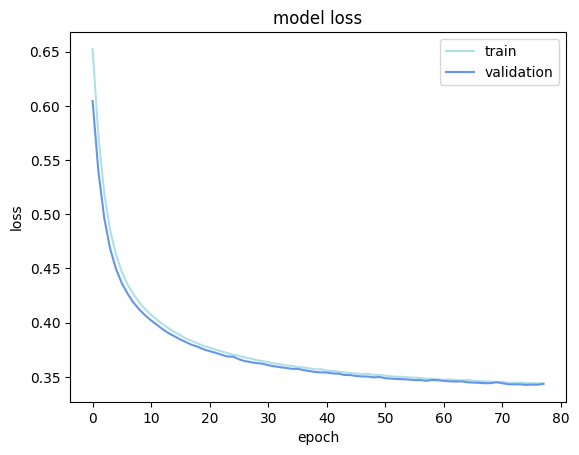

In [ ]:
plt.plot(history.history['loss'], color='powderblue')
plt.plot(history.history['val_loss'], color='cornflowerblue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# 5. Test

In [ ]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

72/72 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8324

Test loss: 0.33. Test accuracy: 83.24%
